In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [5]:
# Simulated data with multicollinearity
np.random.seed(0)
X1 = np.random.rand(100, 1) * 10
X2 = X1 + np.random.randn(100, 1)
X3 = 2 * X1 + 3 * X2 + np.random.randn(100, 1)

X = np.concatenate((X1, X2, X3), axis=1)
y = 5 * X1 + 7 * X2 + 9 * X3 + np.random.randn(100, 1) * 10

In [6]:
X.shape, y.shape

((100, 3), (100, 1))

In [7]:
# Fit a linear regression model
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression()

In [8]:
X.shape, y.shape

((100, 3), (100, 1))

#### Assumption 1: Linearity: 

- This assumption is about the relationship between the features and the target being linear. We visualize the data along with the linear fit to check if the linear model captures the trend.

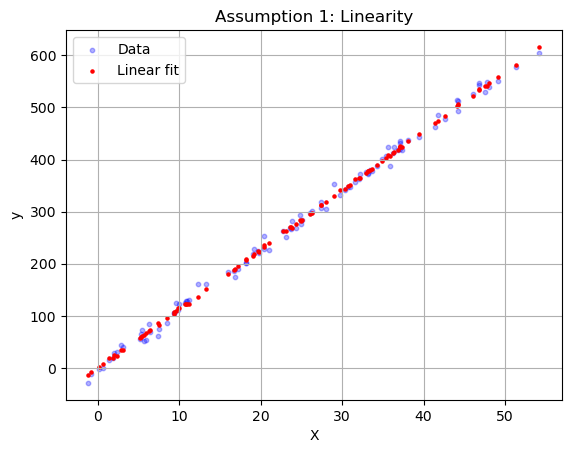

In [9]:
# Assumption 1: Linearity
plt.scatter(X[:, 2], y, color='blue', s=10, alpha=.3, label='Data')
plt.scatter(X[:, 2], regressor.predict(X), color='red', s=5, label='Linear fit')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Assumption 1: Linearity')
plt.legend()
plt.grid()

#### Assumption 2: Independence of Residuals: 

- Residuals are the differences between the actual target values and the predicted values. We plot residuals against the feature values to check for any patterns or dependencies.

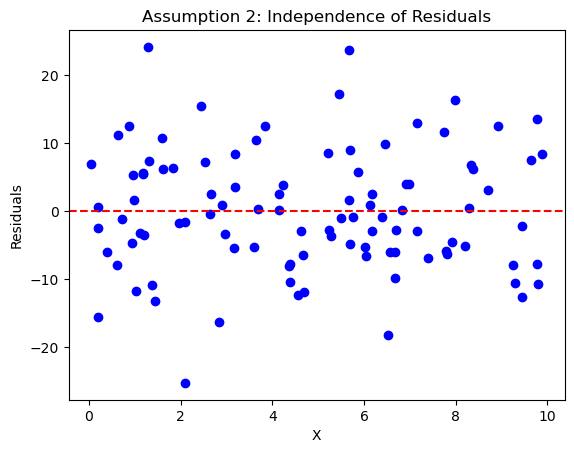

In [10]:
# Assumption 2: Independence of residuals
residuals = y - regressor.predict(X)

plt.scatter(X[:, 0], residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('X')
plt.ylabel('Residuals')
plt.title('Assumption 2: Independence of Residuals')
plt.show()

In [11]:
np.sum(residuals)

-6.618705583605333e-12

#### Assumption 3: Homoscedasticity: 
- This assumption assumes that the residuals have constant variance across all levels of the target variable. We plot the residuals against the predicted values to assess whether the spread of residuals is consistent.

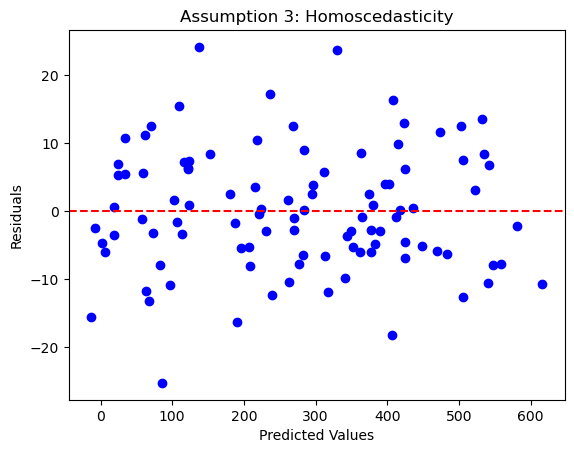

In [12]:
# Assumption 3: Homoscedasticity
plt.scatter(regressor.predict(X), residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Assumption 3: Homoscedasticity')
plt.show()

these visualizations provide a qualitative assessment of the assumptions and might not be definitive. In practice, more advanced statistical tests and diagnostics are used to thoroughly assess these assumptions before relying on the linear regression model.

#### Assumptions 4: No Multicollinearity
- Predictor variables should not be highly correlated with each other. High multicollinearity can lead to difficulties in interpreting coefficients and making predictions.

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [18]:
# Simulated data with multicollinearity
np.random.seed(0)

X1 = np.random.rand(100, 1) * 10

X2 = X1 + np.random.randn(100, 1)
#X2 =  np.random.randn(100, 1)

X3 = 2 * X1 + 3 * X2 + np.random.randn(100, 1)
#X3 = np.random.randn(100, 1)

X = np.concatenate((X1, X2, X3), axis=1)

y = 5 * X1 + 7 * X2 + 9 * X3 + np.random.randn(100, 1) * 10

we generate simulated data where 
- X2 is highly correlated with X1 and 
- X3 is a linear combination of X1 and X2. 

The target variable y is a linear combination of all three predictors.

In [19]:
X.shape

(100, 3)

In [20]:
X.shape[1]

3

In [21]:
# # Fit a linear regression model
# regressor = LinearRegression()
# regressor.fit(X, y)

# Calculate Variance Inflation Factors (VIF)
vif = pd.DataFrame()
vif["Feature"] = ["X1", "X2", "X3"]
vif["VIF"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]

print(vif)

  Feature         VIF
0      X1  144.511601
1      X2  375.732983
2      X3  839.381216


 calculate the Variance Inflation Factor (VIF) for each predictor variable to assess multicollinearity. The VIF measures how much the variance of the estimated regression coefficients is increased due to multicollinearity. Generally, a VIF value greater than 5 or 10 is often considered indicative of multicollinearity.

The code prints the VIF values for each predictor variable. If you observe high VIF values (indicating high multicollinearity), it's an indication that the model's coefficients might not be reliable and further investigation or remediation might be necessary, such as removing one of the correlated variables or using techniques like Principal Component Analysis (PCA).

#### Summary

- It's important to note that while these assumptions are desirable for linear regression, real-world data often violates one or more of them to some extent. Detecting violations and addressing them appropriately is a critical part of regression analysis.
- If assumptions are not met, it might be necessary to consider alternative modeling approaches or perform transformations on the data to better satisfy the assumptions.